<div >
    <img src = "../banner/banner_ML_UNLP_1900_200.png" />
</div>


<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/ML_UNLP_Lectures/blob/main/Week05/Notebook_NN_MNIST.pynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Clasificando digitos con Redes Neuronales 

Uno de los conjuntos de datos ampliamente utilizados para la clasificación de imágenes es el conjunto de datos MNIST (LeCun et al., 1998) de dígitos escritos a mano. En el momento de su lanzamiento en la década de 1990, planteó un desafío formidable para la mayoría de los algoritmos de aprendizaje automático, que constaba de 60.000 imágenes de  resolución28x28  de píxeles (más un conjunto de datos de prueba de 10,000 imágenes).

 Lograr una alta precisión en el reconocimiento de dígitos fue un componente clave en la automatización de la clasificación de cartas para el servicio postal de EEUU.

Durante más de una década, MNIST sirvió como punto de referencia para comparar algoritmos de aprendizaje automático.

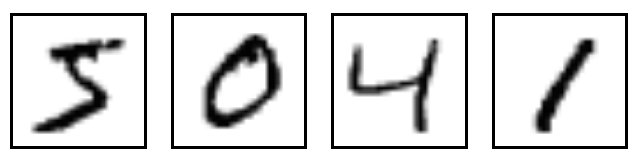


## Llamando las librerías

In [8]:
# install.packages("pacman") #run this line if you use Google Colab

In [9]:
require('pacman')
p_load("tidyverse","keras3","caret")

## Cargamos los datos

In [10]:
set.seed(10101)

mnist <- dataset_mnist()

### Muestra de entrenamiento

In [11]:
# X de entrenamiento
x_train <- mnist$train$x
dim(x_train)

[1] 60000    28    28

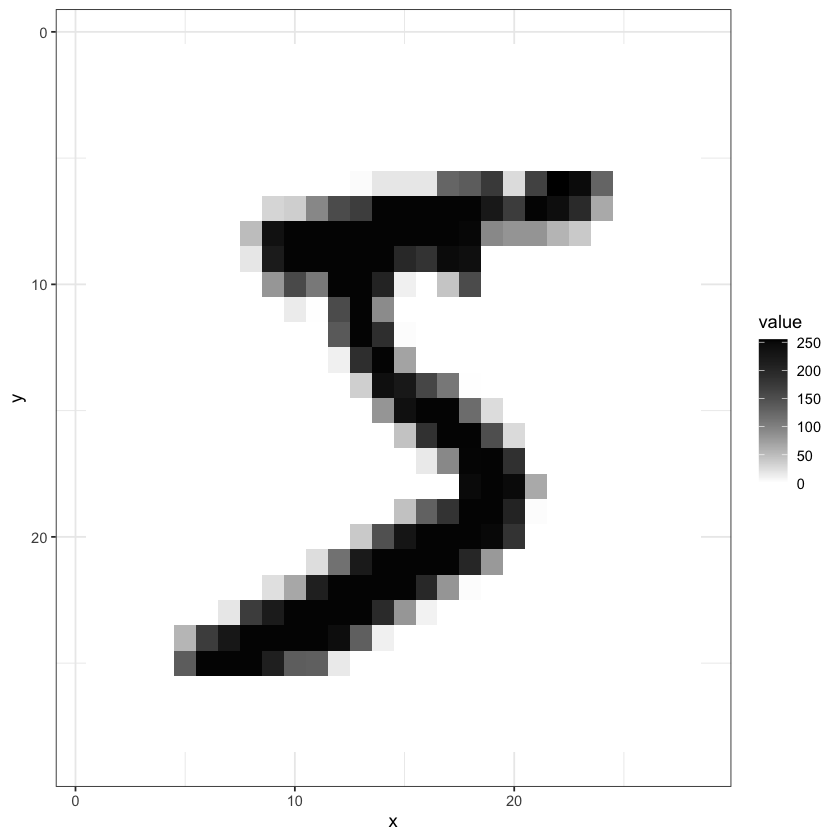

In [12]:
image_1 <- as.data.frame(x_train[1, , ]) 
colnames(image_1) <- seq_len(ncol(image_1))
image_1$y <- seq_len(nrow(image_1))
image_1 <- gather(image_1, "x", "value", -y)
image_1$x <- as.integer(image_1$x)

ggplot(image_1, aes(x = x, y = y, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "black", na.value = NA) +
  scale_y_reverse() +
  theme_bw()

In [13]:
# Variable dependiente -> target
y_train <- mnist$train$y
head(y_train)

[1] 5 0 4 1 9 2

### Muestra de Prueba

In [14]:
x_test <- mnist$test$x


In [15]:
y_test <- mnist$test$y

### Limpieza de los datos

In [16]:
# reshape
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
dim(x_train)

[1] 60000   784

In [17]:
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

In [18]:
# rescale pixeles entre 0 y 1
x_train <- x_train / 255
x_test <- x_test / 255

## Armando la primer red

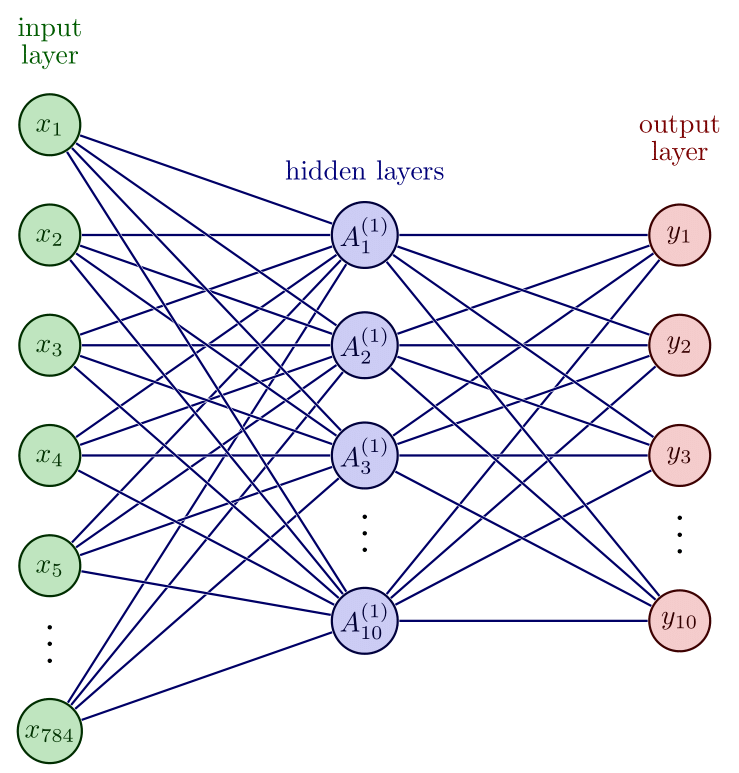

Comenzamos creando un nuevo modelo usando `keras_model_sequential()`. Esto define una arquitectura lineal: cada capa que agregamos se apilará en orden, una después de otra. 

In [19]:
model <- keras_model_sequential() 

# Definimos las capas
model %>% 
  layer_dense(units = 10, activation = 'relu', input_shape = c(784)) %>% 
  layer_dense(units = 10, activation = 'softmax')

### Dense

En una capa `layer_dense`, cada neurona está conectada a todas las neuronas de la capa anterior. Los `units`que se especifican en los parámetros, se refieren a la cantidad de neuronas que se deben incluir en una capa determinada de la red neuronal. Es decir, los units son el número de nodos de la capa. Por último, el parámetro `activation`  especifica la función de activación que se va a usar en esa capa de la red.



### Capa de salida: The softmax function

Multinomial logistic 

\begin{align}
 \Pr(Y_{i}=k)={\frac {e^{{\boldsymbol {\beta }}_{k}\cdot \mathbf {A} _{i}}}{\sum _{j=1}^{K}e^{{\boldsymbol {\beta }}_{j}\cdot \mathbf {A} _{i}}}}
\end{align}




In [20]:
beta_A<-c(1.3,2.2,0.7,1.1,2.5,7.3,3.1,4.5,1.3,1.8)

pr<-exp(beta_A)/sum(exp(beta_A))

pr

[1] 0.002248166 0.005529597 0.001233820 0.001840643 0.007464175 0.906975013
 [7] 0.013600613 0.055153207 0.002248166 0.003706600

#### Target como categóricos


In [21]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)
head(y_train)

0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0


## Modelo Final

In [22]:
summary(model)

Model: "sequential"
<U+250F><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2533><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2533><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2513>
<U+2503> Layer (type)                      <U+2503> Output Shape             <U+2503>       Param # <U+2503>
<U+2521><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+250

## Entrenando la primera red

In [23]:
model %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = c('accuracy')
)

### Función de pérdida

Cross-entropy nos permite medir el error entre las probabilidades predichas y los verdaderos valores

$$
L(\theta) =\sum _{k=1}^{K} 1(Y=k)  \log_2 \left(\hat{Pr}(Y=k)\right) 
$$



In [24]:
L <- y_train[1,]*log2(0.01)

L

[1]  0.000000  0.000000  0.000000  0.000000  0.000000 -6.643856  0.000000
 [8]  0.000000  0.000000  0.000000

In [25]:
sum(L)

[1] -6.643856

### Optimizador

 `Adam`  para saber más de este pueden ir [acá](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

### Métrica 

Usamos `accuracy` como métrica de desempeño. 

$$
\text{accuracy} = \frac{\text{correct predictions}}{\text{total predictions}}
$$

Buscamos ver la proporción de dígitos clasificados correctamente

## Entrenamiento

Estamos listos para entrenar la red. Comenzamos fijando una semilla aleatoria para asegurar la reproducibilidad de los resultados. Esto es importante porque el 20% de los datos de entrenamiento se reserva automáticamente —y de forma aleatoria— para validación, lo que permite monitorear el desempeño del modelo en datos no vistos. Dado que esta partición cambia en cada corrida, fijar la semilla garantiza consistencia.

A diferencia de enfoques como la validación cruzada (CV), aquí usamos una partición fija del 20% para mantener bajo el costo computacional. Entrenar redes neuronales suele ser intensivo, por lo que repetir el entrenamiento múltiples veces —como exige la validación cruzada— puede volverse costoso o innecesario si tenemos suficientes datos. Reservar un 20% ofrece un buen balance entre evaluar generalización (error fuera de muestra) y eficiencia computacional.

Luego, entrenamos el modelo durante 30 épocas, utilizando mini-batches de tamaño 256.

In [26]:
set.seed(101010) # reproducibilidad


history <- model %>% fit(
  x_train, y_train,        
  epochs = 30,             # Número de veces que el modelo ve todo el dataset
  batch_size = 512,        # Tamaño del mini-batch (2^8): controla cuántos datos se usan para calcular el gradiente
  validation_split = 0.2   # Reserva el 20% de los datos de entrenamiento para validación
)

Durante el entrenamiento, el modelo sigue estos pasos:

* Recibe los datos de entrenamiento (`x_train`, `y_train`).
* Aprende a asociar entradas y salidas (por ejemplo, imágenes con etiquetas).
* Evalúa su desempeño en un conjunto de validación reservado automáticamente.

Al llamar al método `fit()`, el modelo se ajusta a los datos. En este ejemplo especificamos dos hiperparámetros clave: `epochs` y `batch_size`

- Un `epoch` es una pasada completa del conjunto de entrenamiento a través de la red. Es decir, todos los datos se procesan una vez, tanto hacia adelante (forwardpasss donde cálculamos las predicciones) como hacia atrás (backpropagation). El número de épocas define cuántas veces se repite este proceso.


- El `batch size` determina cuántas muestras se procesan antes de actualizar los pesos del modelo. En lugar de calcular el gradiente con todo el dataset (batch gradient descent) o con una sola observación (stochastic gradient descent), usamos mini-batches. En este ejemplo, se usan bloques de 256 observaciones. Recordemos
    - `batch_size = 1`: es **Stochastic Gradient Descent (SGD)** → más ruido.
    - `batch_size = ncol(X)` (todo el dataset): es **Batch Gradient Descent** → estable pero lento.
    - `batch_size =2^k` (valores típicos: 32, 64, 128, 256, 512): es **Mini-batch Gradient Descent**, combina velocidad y estabilidad. (GPUs trabajan mejor con potencias de 2)


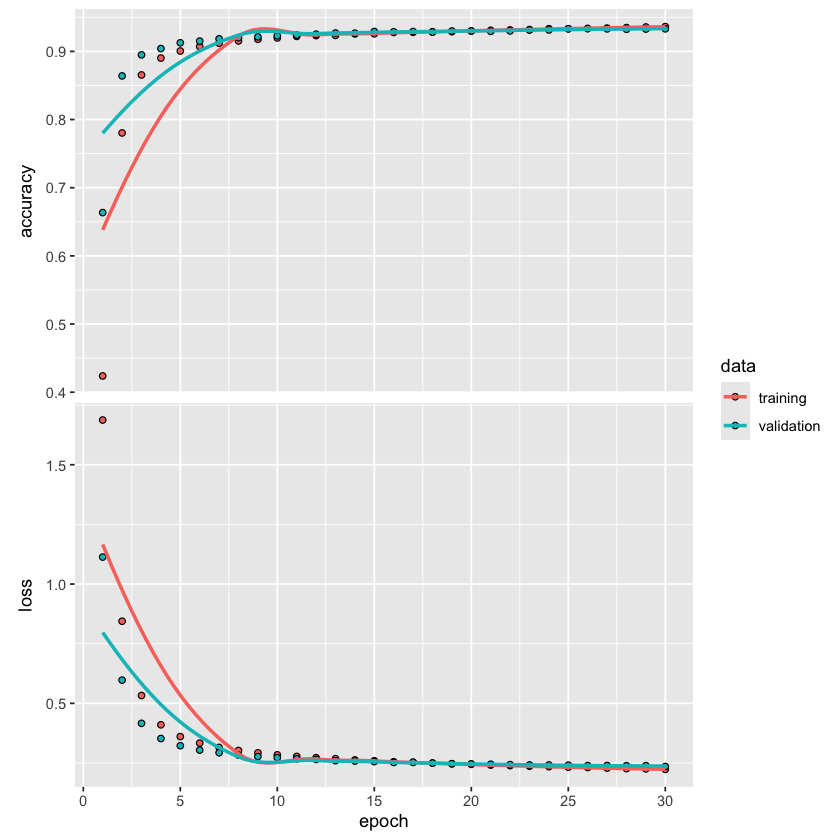

In [27]:
plot(history)

In [28]:
model %>% evaluate(x_test, y_test)

$accuracy
[1] 0.9318

$loss
[1] 0.2424531

In [30]:
y_hat <- model  %>% predict(x_test) %>% op_argmax() #categoría con probabilidad mas alta
y_hat

tf.Tensor(81110, shape=(), dtype=int32)

In [35]:
as.numeric(as.array(y_hat))

[1] 81110

In [31]:
confusionMatrix(data = factor(as.numeric(y_hat), levels = 0:9), 
  reference = factor(mnist$test$y, levels = 0:9))

ERROR: Error in table(data, reference, dnn = dnn, ...): all arguments must have the same length


## Arquitectura de redes y capas múltiples

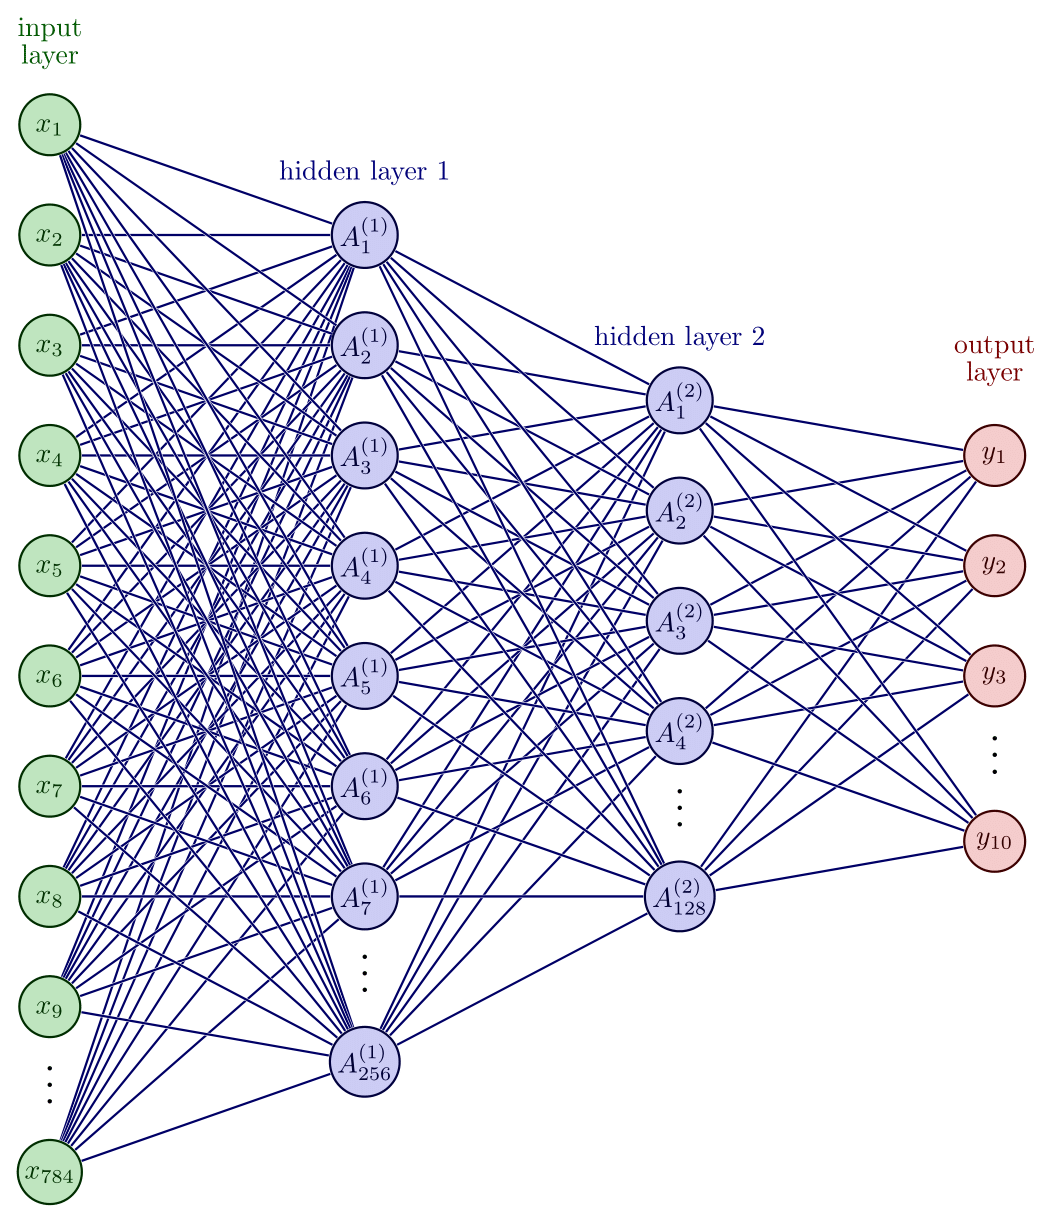

In [ ]:
model2 <- keras_model_sequential() 

model2 %>%
layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
layer_dense(units = 128, activation = 'relu') %>%
layer_dense(units = 10, activation = 'softmax')

In [ ]:
summary(model2)

In [ ]:
model2 %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = c('accuracy')
)

In [ ]:
set.seed(101010)
history2 <- model2 %>% fit(
  x_train, y_train, 
  epochs = 8, 
  batch_size = 128,
  validation_split = 0.2
)

In [ ]:
plot(history2)

In [ ]:
model2 %>% evaluate(x_test, y_test)

## Network Tunning

### Dropout Learning

Esta es una forma de regularización relativamente nueva y eficiente. Inspirado en los random forest, la idea es eliminar aleatoriamente una fracción $\phi$ de las unidades en una capa al ajustar el modelo. 

Las unidades sobrevivientes sustituyen a las que faltan y sus pesos aumentan en un factor de 1/(1 − φ) para compensar. Esto evita que los nodos se especialicen demasiado, llevando a sobreajuste.

Puede ser visto como una forma de regularización. 

En la práctica, el "dropout" se logra configurando aleatoriamente los nodos  "abandonados" a cero, mientras se mantiene intacta la arquitectura.

In [ ]:
model3 <- keras_model_sequential() 

model3 %>%
layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
layer_dropout(rate = 0.4) %>%
layer_dense(units = 128, activation = 'relu') %>%
layer_dropout(rate = 0.3) %>%
layer_dense(units = 10, activation = 'softmax')

In [ ]:
model3 %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = c('accuracy')
)

In [ ]:
set.seed(101010)
history3 <- model3 %>% fit(
  x_train, y_train, 
  epochs = 30, 
  batch_size = 128,
  validation_split = 0.2
)

In [ ]:
model3 %>% evaluate(x_test, y_test)

## Otras arquitecturas: Convolutional Neural Networks

En nuestro análisis inicial de imágenes, usamos una red neuronal de múltiples capas (MLP). Para eso, aplanamos cada imagen —una matriz de \(28 \times 28\)— en un vector de 784 elementos, y luego la pasamos por capas completamente conectadas.

Sin embargo, existen otras arquitecturas que aprovechan mejor la **estructura espacial** de las imágenes. Las redes convolucionales (CNN) incorporan capas especializadas que permiten construir modelos **más compactos**, con **menos parámetros** y, en muchos casos, con **mejor desempeño**.

Comenzamos creando un nuevo modelo con `keras_model_sequential()`, que mantiene una arquitectura secuencial. A esta le agregamos dos tipos de capas nuevas:

- **`conv_2d`**: detectan patrones visuales locales como bordes y formas.
- **`max_pooling_2d`**: reducen la dimensionalidad y el ruido, conservando la información más relevante.

Después de estas transformaciones, "aplanamos" nuevamente los datos para pasarlos por la parte final de la red:

- **`flatten`**: convierte los mapas de activación en un vector.
- **`dense`**: realiza la clasificación final en 10 clases usando `softmax`.

Entre capas, también agregamos algo de **`dropout`**, que ayuda a prevenir el sobreajuste, como quien dice, “salpicado” a lo largo del modelo.

In [ ]:
# Input image dimensions
img_rows <- 28
img_cols <- 28

x_train <- array_reshape(x_train, c(nrow(x_train), img_rows, img_cols, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), img_rows, img_cols, 1))
input_shape <- c(img_rows, img_cols, 1)


cnn_model <- keras_model_sequential() 

cnn_model %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu', input_shape =input_shape) %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = 10, activation = 'softmax')

Una vez definida la arquitectura, el siguiente paso es compilar:

In [ ]:
cnn_model %>% compile(
   optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = c('accuracy')
)


Entrenamos:

In [ ]:
set.seed(101010)
cnn_history <- cnn_model %>% fit(
  x_train, y_train, 
  epochs = 10, 
  batch_size = 128,
  validation_split = 0.2
)

Evaluamos en el conjunto de prueba:

In [ ]:
cnn_model %>% evaluate(x_test, y_test)

El error que obtenemos es muy bajo, lo que confirma que esta arquitectura convolucional es mucho más adecuada para procesar imágenes que la red neuronal densa que usamos inicialmente. La red logró capturar patrones espaciales clave que una MLP simplemente no puede ver.

Este es un gran salto respecto a lo que teníamos, pero también es apenas el comienzo. Existen arquitecturas aún más sofisticadas que pueden mejorar aún más el desempeño, especialmente en tareas más complejas:

- **Redes más profundas** (como VGG o ResNet), que aprenden jerarquías de características.
- **Redes convolucionales con atención**, que enfocan el procesamiento en regiones relevantes.
- **Modelos preentrenados** y transferencia de aprendizaje, que permiten aprovechar redes entrenadas sobre grandes datasets.

En cursos mas avanzados verán otras arquitecturas mas complejas y que se adaptan mejor a problemas especificos. Esto es solo la superficie.